In [3]:
import matplotlib.pyplot as plt

from matplotlib.patches import Polygon, Wedge

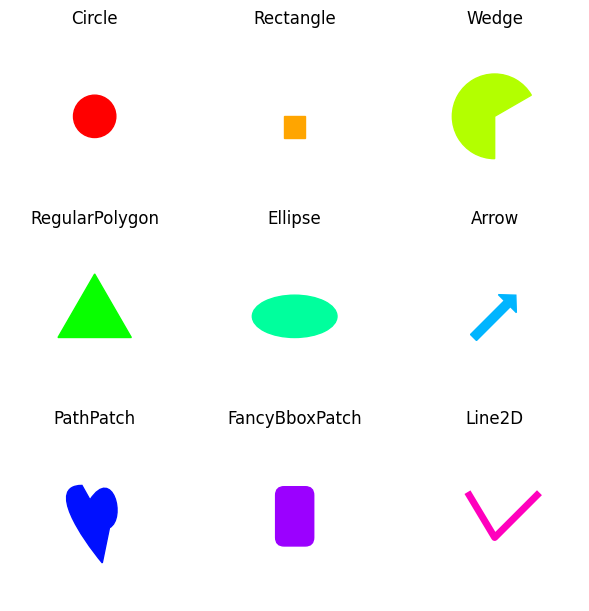

In [11]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath

# Prepare the data for the PathPatch below.
Path = mpath.Path
codes, verts = zip(*[
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])])

artists = [
    mpatches.Circle((0, 0), 0.05, ec="none"),
    mpatches.Rectangle((-0.025, -0.05), 0.05, 0.05, ec="none"),
    mpatches.Wedge((0, 0), 0.1, 30, 270, ec="none"),
    mpatches.RegularPolygon((0, 0), 3, radius=0.1),
    mpatches.Ellipse((0, 0), 0.2, 0.1),
    mpatches.Arrow(-0.05, -0.05, 0.1, 0.1, width=0.1),
    mpatches.PathPatch(mpath.Path(verts, codes), ec="none"),
    mpatches.FancyBboxPatch((-0.025, -0.05), 0.05, 0.1, ec="none",
                            boxstyle=mpatches.BoxStyle("Round", pad=0.02)),
    mlines.Line2D([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05], lw=5),
]

axs = plt.figure(figsize=(6, 6), layout="constrained").subplots(3, 3)
for i, (ax, artist) in enumerate(zip(axs.flat, artists)):
    artist.set(color=mpl.colormaps["hsv"](i / len(artists)))
    ax.add_artist(artist)
    ax.set(title=type(artist).__name__,
           aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
    ax.set_axis_off()
plt.show()

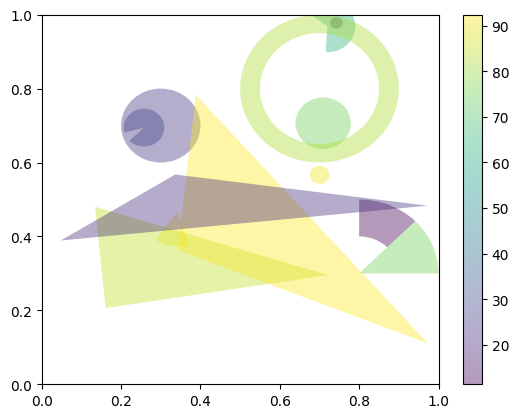

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon, Wedge

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), closed=True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

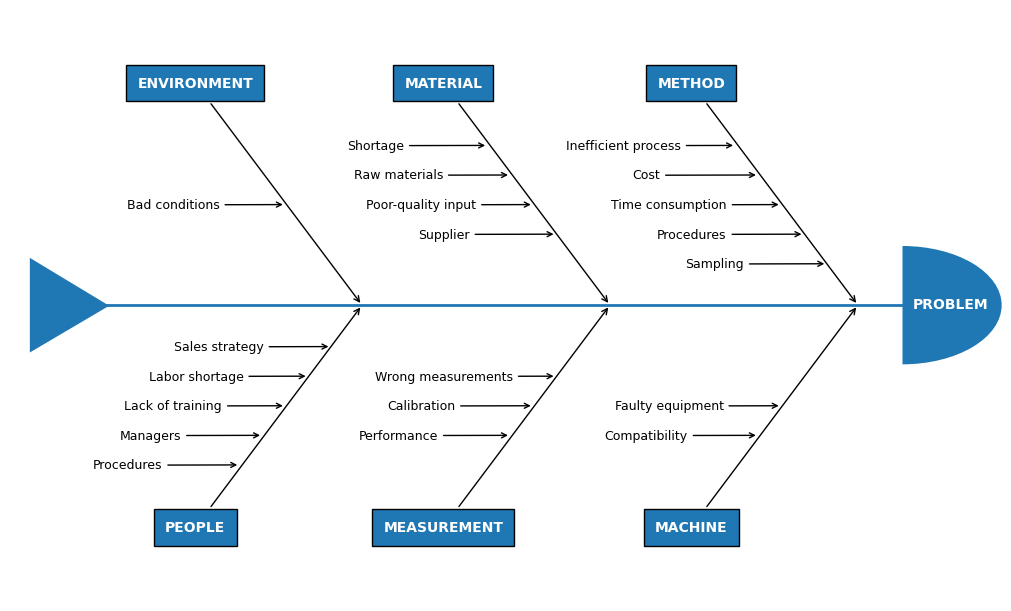

In [14]:
import math

import matplotlib.pyplot as plt

from matplotlib.patches import Polygon, Wedge

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')


def problems(data: str,
             problem_x: float, problem_y: float,
             angle_x: float, angle_y: float):
    """
    Draw each problem section of the Ishikawa plot.

    Parameters
    ----------
    data : str
        The name of the problem category.
    problem_x, problem_y : float, optional
        The `X` and `Y` positions of the problem arrows (`Y` defaults to zero).
    angle_x, angle_y : float, optional
        The angle of the problem annotations. They are always angled towards
        the tail of the plot.

    Returns
    -------
    None.

    """
    ax.annotate(str.upper(data), xy=(problem_x, problem_y),
                xytext=(angle_x, angle_y),
                fontsize=10,
                color='white',
                weight='bold',
                xycoords='data',
                verticalalignment='center',
                horizontalalignment='center',
                textcoords='offset fontsize',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                bbox=dict(boxstyle='square',
                          facecolor='tab:blue',
                          pad=0.8))


def causes(data: list,
           cause_x: float, cause_y: float,
           cause_xytext=(-9, -0.3), top: bool = True):
    """
    Place each cause to a position relative to the problems
    annotations.

    Parameters
    ----------
    data : indexable object
        The input data. IndexError is
        raised if more than six arguments are passed.
    cause_x, cause_y : float
        The `X` and `Y` position of the cause annotations.
    cause_xytext : tuple, optional
        Adjust to set the distance of the cause text from the problem
        arrow in fontsize units.
    top : bool, default: True
        Determines whether the next cause annotation will be
        plotted above or below the previous one.

    Returns
    -------
    None.

    """
    for index, cause in enumerate(data):
        # [<x pos>, <y pos>]
        coords = [[0.02, 0],
                  [0.23, 0.5],
                  [-0.46, -1],
                  [0.69, 1.5],
                  [-0.92, -2],
                  [1.15, 2.5]]

        # First 'cause' annotation is placed in the middle of the 'problems' arrow
        # and each subsequent cause is plotted above or below it in succession.
        cause_x -= coords[index][0]
        cause_y += coords[index][1] if top else -coords[index][1]

        ax.annotate(cause, xy=(cause_x, cause_y),
                    horizontalalignment='center',
                    xytext=cause_xytext,
                    fontsize=9,
                    xycoords='data',
                    textcoords='offset fontsize',
                    arrowprops=dict(arrowstyle="->",
                                    facecolor='black'))


def draw_body(data: dict):
    """
    Place each problem section in its correct place by changing
    the coordinates on each loop.

    Parameters
    ----------
    data : dict
        The input data (can be a dict of lists or tuples). ValueError
        is raised if more than six arguments are passed.

    Returns
    -------
    None.

    """
    # Set the length of the spine according to the number of 'problem' categories.
    length = (math.ceil(len(data) / 2)) - 1
    draw_spine(-2 - length, 2 + length)

    # Change the coordinates of the 'problem' annotations after each one is rendered.
    offset = 0
    prob_section = [1.55, 0.8]
    for index, problem in enumerate(data.values()):
        plot_above = index % 2 == 0
        cause_arrow_y = 1.7 if plot_above else -1.7
        y_prob_angle = 16 if plot_above else -16

        # Plot each section in pairs along the main spine.
        prob_arrow_x = prob_section[0] + length + offset
        cause_arrow_x = prob_section[1] + length + offset
        if not plot_above:
            offset -= 2.5
        if index > 5:
            raise ValueError(f'Maximum number of problems is 6, you have entered '
                             f'{len(data)}')

        problems(list(data.keys())[index], prob_arrow_x, 0, -12, y_prob_angle)
        causes(problem, cause_arrow_x, cause_arrow_y, top=plot_above)


def draw_spine(xmin: int, xmax: int):
    """
    Draw main spine, head and tail.

    Parameters
    ----------
    xmin : int
        The default position of the head of the spine's
        x-coordinate.
    xmax : int
        The default position of the tail of the spine's
        x-coordinate.

    Returns
    -------
    None.

    """
    # draw main spine
    ax.plot([xmin - 0.1, xmax], [0, 0], color='tab:blue', linewidth=2)
    # draw fish head
    ax.text(xmax + 0.1, - 0.05, 'PROBLEM', fontsize=10,
            weight='bold', color='white')
    semicircle = Wedge((xmax, 0), 1, 270, 90, fc='tab:blue')
    ax.add_patch(semicircle)
    # draw fish tail
    tail_pos = [[xmin - 0.8, 0.8], [xmin - 0.8, -0.8], [xmin, -0.01]]
    triangle = Polygon(tail_pos, fc='tab:blue')
    ax.add_patch(triangle)


# Input data
categories = {
    'Method': ['Time consumption', 'Cost', 'Procedures', 'Inefficient process',
               'Sampling'],
    'Machine': ['Faulty equipment', 'Compatibility'],
    'Material': ['Poor-quality input', 'Raw materials', 'Supplier',
                 'Shortage'],
    'Measurement': ['Calibration', 'Performance', 'Wrong measurements'],
    'Environment': ['Bad conditions'],
    'People': ['Lack of training', 'Managers', 'Labor shortage',
               'Procedures', 'Sales strategy']
}

draw_body(categories)
plt.show()

In [15]:
import inspect

import matplotlib.pyplot as plt

import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms

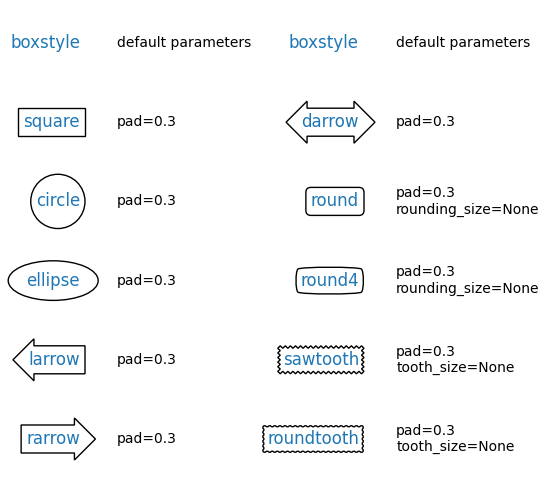

In [16]:
styles = mpatch.BoxStyle.get_styles()
ncol = 2
nrow = (len(styles) + 1) // ncol
axs = (plt.figure(figsize=(3 * ncol, 1 + nrow))
       .add_gridspec(1 + nrow, ncol, wspace=.5).subplots())
for ax in axs.flat:
    ax.set_axis_off()
for ax in axs[0, :]:
    ax.text(.2, .5, "boxstyle",
            transform=ax.transAxes, size="large", color="tab:blue",
            horizontalalignment="right", verticalalignment="center")
    ax.text(.4, .5, "default parameters",
            transform=ax.transAxes,
            horizontalalignment="left", verticalalignment="center")
for ax, (stylename, stylecls) in zip(axs[1:, :].T.flat, styles.items()):
    ax.text(.2, .5, stylename, bbox=dict(boxstyle=stylename, fc="w", ec="k"),
            transform=ax.transAxes, size="large", color="tab:blue",
            horizontalalignment="right", verticalalignment="center")
    ax.text(.4, .5, str(inspect.signature(stylecls))[1:-1].replace(", ", "\n"),
            transform=ax.transAxes,
            horizontalalignment="left", verticalalignment="center")

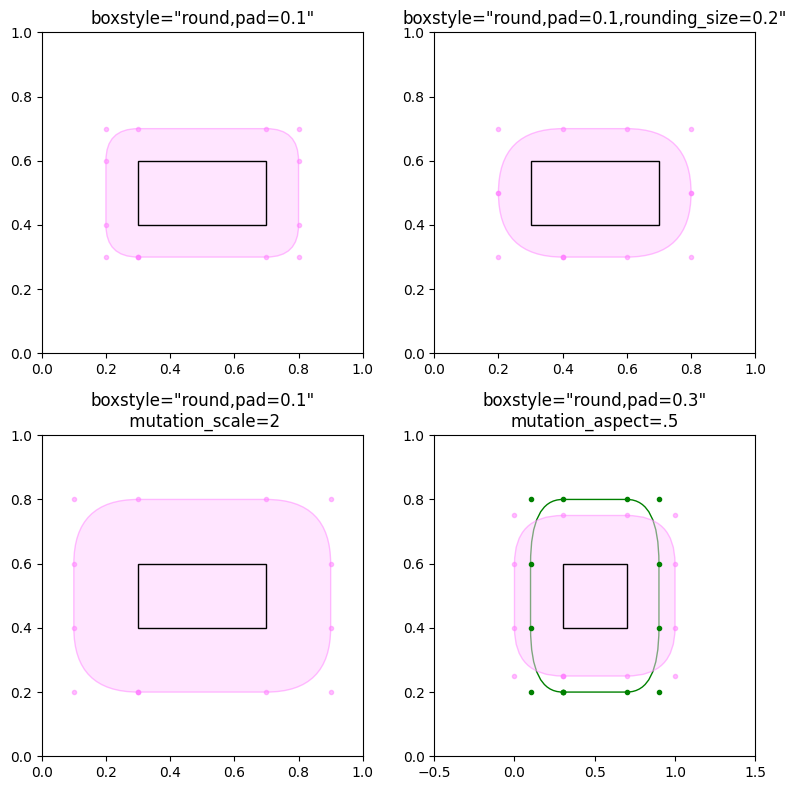

In [17]:
def add_fancy_patch_around(ax, bb, **kwargs):
    fancy = FancyBboxPatch(bb.p0, bb.width, bb.height,
                           fc=(1, 0.8, 1, 0.5), ec=(1, 0.5, 1, 0.5),
                           **kwargs)
    ax.add_patch(fancy)
    return fancy


def draw_control_points_for_patches(ax):
    for patch in ax.patches:
        patch.axes.plot(*patch.get_path().vertices.T, ".",
                        c=patch.get_edgecolor())


fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])

ax = axs[0, 0]
# a fancy box with round corners. pad=0.1
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"')

ax = axs[0, 1]
# bbox=round has two optional arguments: pad and rounding_size.
# They can be set during the initialization.
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.1")
# The boxstyle and its argument can be later modified with set_boxstyle().
# Note that the old attributes are simply forgotten even if the boxstyle name
# is same.
fancy.set_boxstyle("round,pad=0.1,rounding_size=0.2")
# or: fancy.set_boxstyle("round", pad=0.1, rounding_size=0.2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1,rounding_size=0.2"')

ax = axs[1, 0]
# mutation_scale determines the overall scale of the mutation, i.e. both pad
# and rounding_size is scaled according to this value.
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.1", mutation_scale=2)
ax.set(xlim=(0, 1), ylim=(0, 1), aspect=1,
       title='boxstyle="round,pad=0.1"\n mutation_scale=2')

ax = axs[1, 1]
# When the aspect ratio of the Axes is not 1, the fancy box may not be what you
# expected (green).
fancy = add_fancy_patch_around(ax, bb, boxstyle="round,pad=0.2")
fancy.set(facecolor="none", edgecolor="green")
# You can compensate this by setting the mutation_aspect (pink).
fancy = add_fancy_patch_around(
    ax, bb, boxstyle="round,pad=0.3", mutation_aspect=0.5)
ax.set(xlim=(-.5, 1.5), ylim=(0, 1), aspect=2,
       title='boxstyle="round,pad=0.3"\nmutation_aspect=.5')

for ax in axs.flat:
    draw_control_points_for_patches(ax)
    # Draw the original bbox (using boxstyle=square with pad=0).
    fancy = add_fancy_patch_around(ax, bb, boxstyle="square,pad=0")
    fancy.set(edgecolor="black", facecolor="none", zorder=10)

fig.tight_layout()


plt.show()